<a href="https://colab.research.google.com/github/AnHaiTrinh/handson-ml/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, cross_val_predict
from sklearn.base import clone
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target']
some_digit = X.iloc[0]
some_digit.values

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

(-0.5, 27.5, 27.5, -0.5)

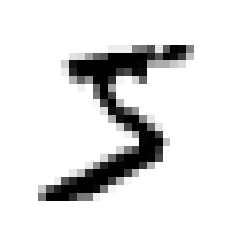

In [3]:
some_digit_image = some_digit.values.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary, interpolation="nearest")
plt.axis("off")

In [4]:
y = y.astype(np.uint8)
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [5]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)
sgd_clf.predict([some_digit])

array([ True])

In [6]:
cv_scores = cross_val_score(sgd_clf, X_train, y_train_5, scoring='accuracy', cv=3)
print("Scores:", cv_scores)
print("Mean:", cv_scores.mean())

Scores: [0.95035 0.96035 0.9604 ]
Mean: 0.9570333333333334


In [7]:
skfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
for train_index, test_index in skfold.split(X_train, y_train_5):
    sgd_clone = clone(sgd_clf)
    X_train_fold = X_train.iloc[train_index]
    X_test_fold = X_train.iloc[test_index]
    y_train_fold = y_train_5.iloc[train_index]
    y_test_fold = y_train_5.iloc[test_index]

    sgd_clone.fit(X_train_fold, y_train_fold)
    y_pred = sgd_clone.predict(X_test_fold)
    accuracy = sum(y_pred == y_test_fold) / len(test_index)
    print("Accuracy:", accuracy)

Accuracy: 0.9669
Accuracy: 0.91625
Accuracy: 0.96785


In [8]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [9]:
y_prefect_pred = y_train_5
confusion_matrix(y_train_5, y_prefect_pred)

array([[54579,     0],
       [    0,  5421]])

In [10]:
print("Precision score:", precision_score(y_train_5, y_train_pred))
print("Recall score:", recall_score(y_train_5, y_train_pred))
print("F1 Score:", f1_score(y_train_5, y_train_pred))

Precision score: 0.8370879772350012
Recall score: 0.6511713705958311
F1 Score: 0.7325171197343846


In [11]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [12]:
def plot_pr_against_thresholds_curve(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
    plt.xlabel("Thresholds", fontsize=16)
    plt.grid(True)
    plt.axis([-50000, 50000, 0, 1])
    plt.legend(loc='center right', fontsize=16)

90% threshold: 3370.019499143958
Recall tradeoff: 0.4799852425751706


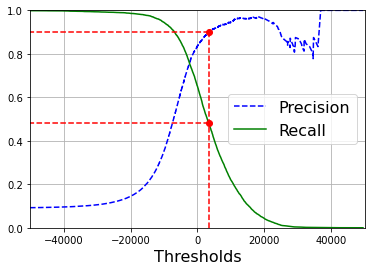

In [13]:
plot_pr_against_thresholds_curve(precisions, recalls, thresholds)
idx_90_percent = np.argmax(precisions >= 0.9)
threshold_90_percent = thresholds[idx_90_percent]
print("90% threshold:", threshold_90_percent)
recall_tradeoff = recalls[idx_90_percent]
print("Recall tradeoff:", recall_tradeoff)
plt.plot([threshold_90_percent], [0.9], 'ro')
plt.plot([threshold_90_percent], [recall_tradeoff], 'ro')
plt.plot([threshold_90_percent, threshold_90_percent], [0, 0.9], 'r--')
plt.plot([threshold_90_percent, -50000], [0.9, 0.9], 'r--')
plt.plot([threshold_90_percent, -50000], [recall_tradeoff, recall_tradeoff], 'r--')

In [14]:
def plot_pr_curve(precisions, recalls):
    plt.plot(recalls, precisions, 'b-')
    plt.xlabel("Recalls", fontsize=16)
    plt.ylabel("Precisions", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

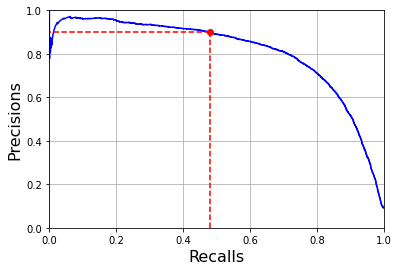

In [15]:
plot_pr_curve(precisions, recalls)
true_precision = precisions[idx_90_percent]
plt.plot([recall_tradeoff], [true_precision], 'ro')
plt.plot([recall_tradeoff, recall_tradeoff], [0, true_precision], 'r--')
plt.plot([recall_tradeoff, 0], [true_precision, true_precision], 'r--')

In [16]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [17]:
def plot_roc_curve(fpr, tpr, label, linestyle='b-'):
    plt.plot(fpr, tpr, linestyle, label=label, linewidth=3)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False positive rate", fontsize=16)
    plt.ylabel("True positive rate", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

In [18]:
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
y_proba = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method='predict_proba')
y_scores_forest = y_proba[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

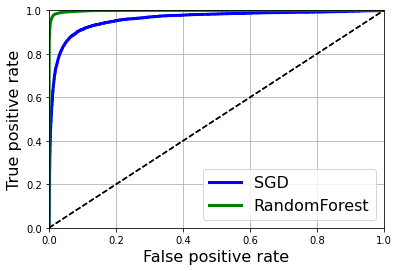

In [19]:
plot_roc_curve(fpr, tpr, label='SGD')
plot_roc_curve(fpr_forest, tpr_forest, "RandomForest", 'g-')
plt.legend(loc='lower right', fontsize=16)

In [20]:
print("SGD:", roc_auc_score(y_train_5, y_scores))
print("RandomForest:", roc_auc_score(y_train_5, y_scores_forest))

SGD: 0.9604938554008616
RandomForest: 0.9983436731328145


In [21]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

In [22]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [23]:
idx_max = np.argmax(some_digit_scores)
print(sgd_clf.classes_)
print(sgd_clf.classes_[idx_max])

[0 1 2 3 4 5 6 7 8 9]
3


In [24]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array([5], dtype=uint8)

In [25]:
forest_clf.predict_proba([some_digit])

array([[0.  , 0.  , 0.01, 0.08, 0.  , 0.9 , 0.  , 0.  , 0.  , 0.01]])

In [26]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [27]:
sgd_clf_scores = cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring='accuracy')
sgd_clf_scores

array([0.8983, 0.891 , 0.9018])

In [28]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mtrx = confusion_matrix(y_train, y_train_pred)
conf_mtrx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]])

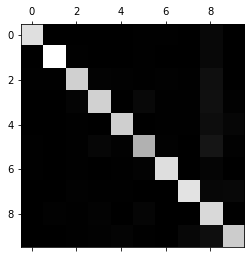

In [29]:
plt.matshow(conf_mtrx, cmap=plt.cm.gray)

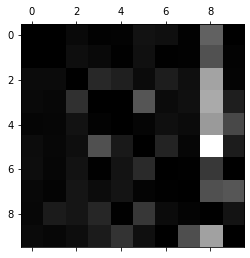

In [30]:
row_sums = conf_mtrx.sum(axis=1, keepdims=True)
recall_mtrx = conf_mtrx / row_sums
np.fill_diagonal(recall_mtrx, 0)
plt.matshow(recall_mtrx, cmap=plt.cm.gray)